In [48]:
import time

import kagglehub

# Download latest version
path = kagglehub.dataset_download("melzohbi/metaphor-detection-vua-wsd-augmented")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\allex\.cache\kagglehub\datasets\melzohbi\metaphor-detection-vua-wsd-augmented\versions\1


In [49]:
import os
import pandas as pd

train_df = pd.read_csv(os.path.join(path, "data/VUA20/train.tsv"), sep='\t')
test_df = pd.read_csv(os.path.join(path, "data/VUA20/test.tsv"), sep='\t')

# get only 617 elements because testing would take too long with the whole dataset

In [50]:
tmp_train_df = train_df[:100]

In [51]:
tmp_train_df

,index,label,sentence,POS,FGPOS,w_index,target,word_sense,definition
0,a1e-fragment01 1,0,Latest corporate unbundler reveals laid-back a...,ADJ,JJS,0,Latest,up to the immediate present; most recent or mo...,Near the end of a period of time.
1,a1e-fragment01 1,0,Latest corporate unbundler reveals laid-back a...,ADJ,JJ,1,corporate,of or belonging to a corporation,Of or relating to a corporation.
2,a1e-fragment01 1,0,Latest corporate unbundler reveals laid-back a...,PROPN,NNP,2,unbundler,unbundler,unbundler
3,a1e-fragment01 1,1,Latest corporate unbundler reveals laid-back a...,VERB,VBZ,3,reveals,make visible,To uncover; to show and display that which was...
4,a1e-fragment01 1,0,Latest corporate unbundler reveals laid-back a...,VERB,VBN,4,laid-back,laid-back,laid-back
...,...,...,...,...,...,...,...,...,...
95,a1e-fragment01 5,0,The 63-year-old head of Pembridge Investments ...,ADP,IN,31,at,at,at
96,a1e-fragment01 5,1,The 63-year-old head of Pembridge Investments ...,NOUN,NN,32,headquarters,(usually plural) the office that serves as the...,The military installation from which troops ar...
97,a1e-fragment01 5,0,The 63-year-old head of Pembridge Investments ...,DET,DT,34,the,the,the
98,a1e-fragment01 5,0,The 63-year-old head of Pembridge Investments ...,ADJ,JJR,35,more,(comparative of `much' used with mass nouns) a...,more


# import the model using Ollama - I am using deepseek-r1 with 14B (using all VRAM resources)

# Create prompt for each row from dataset

In [52]:
def create_prompt(row):
    return (
        f"Sentence: {row['sentence']}\n"
        f"Target Word: {row['target']} (POS: {row['POS']}, Word Index: {row['w_index']}, Word Sense: {row['word_sense']}, definition: {row['definition']})\n"
        "Is the target word used metaphorically? Provide a yes or no answer without explanation."
    )

tmp_train_df.loc[:, 'prompt'] = tmp_train_df.apply(create_prompt, axis=1)

C:\Users\allex\AppData\Local\Temp\ipykernel_22960\3510685946.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_train_df.loc[:, 'prompt'] = tmp_train_df.apply(create_prompt, axis=1)


# Get predictions

In [53]:
tmp_train_df['prediction'] = None

C:\Users\allex\AppData\Local\Temp\ipykernel_22960\668391106.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_train_df['prediction'] = None


In [54]:
tmp_train_df

,index,label,sentence,POS,FGPOS,w_index,target,word_sense,definition,prompt,prediction
0,a1e-fragment01 1,0,Latest corporate unbundler reveals laid-back a...,ADJ,JJS,0,Latest,up to the immediate present; most recent or mo...,Near the end of a period of time.,Sentence: Latest corporate unbundler reveals l...,None
1,a1e-fragment01 1,0,Latest corporate unbundler reveals laid-back a...,ADJ,JJ,1,corporate,of or belonging to a corporation,Of or relating to a corporation.,Sentence: Latest corporate unbundler reveals l...,None
2,a1e-fragment01 1,0,Latest corporate unbundler reveals laid-back a...,PROPN,NNP,2,unbundler,unbundler,unbundler,Sentence: Latest corporate unbundler reveals l...,None
3,a1e-fragment01 1,1,Latest corporate unbundler reveals laid-back a...,VERB,VBZ,3,reveals,make visible,To uncover; to show and display that which was...,Sentence: Latest corporate unbundler reveals l...,None
4,a1e-fragment01 1,0,Latest corporate unbundler reveals laid-back a...,VERB,VBN,4,laid-back,laid-back,laid-back,Sentence: Latest corporate unbundler reveals l...,None
...,...,...,...,...,...,...,...,...,...,...,...
95,a1e-fragment01 5,0,The 63-year-old head of Pembridge Investments ...,ADP,IN,31,at,at,at,Sentence: The 63-year-old head of Pembridge In...,None
96,a1e-fragment01 5,1,The 63-year-old head of Pembridge Investments ...,NOUN,NN,32,headquarters,(usually plural) the office that serves as the...,The military installation from which troops ar...,Sentence: The 63-year-old head of Pembridge In...,None
97,a1e-fragment01 5,0,The 63-year-old head of Pembridge Investments ...,DET,DT,34,the,the,the,Sentence: The 63-year-old head of Pembridge In...,None
98,a1e-fragment01 5,0,The 63-year-old head of Pembridge Investments ...,ADJ,JJR,35,more,(comparative of `much' used with mass nouns) a...,more,Sentence: The 63-year-old head of Pembridge In...,None


In [81]:
model_name = "deepseek-r1:14b"
# model_name = "deepseek-r1:8b"
# model_name = "deepseek-r1:7b"
# model_name = "llama3.2:3b"

In [82]:
from ollama import chat

def get_response_content(prompt):
    stream = chat(
        model= model_name,
        messages = [
            {
                "role": "system",
                "content": "Act as a classification model. Answer the prompts with yes or no."
            },
            {
                "role": "user",
                "content": prompt
            }
        ],
        stream = False,
    )
    # print(stream)
    if "llama" in model_name:
        return stream['message']['content'].strip()
    return stream['message']['content'].split("</think>")[1].strip()

In [83]:
prompt = tmp_train_df['prompt'][0]
prompt

'Sentence: Latest corporate unbundler reveals laid-back approach : Roland Franklin , who is leading a 697m pound break-up bid for DRG , talks to Frank Kane\nTarget Word: Latest (POS: ADJ, Word Index: 0, Word Sense: up to the immediate present; most recent or most up-to-date, definition: Near the end of a period of time.)\nIs the target word used metaphorically? Provide a yes or no answer without explanation.'

In [85]:
get_response_content(prompt)

'No'

In [86]:
from tqdm import tqdm
import time  # Optional, for implementing a delay between retries if needed

tqdm_progress_bar = tqdm(tmp_train_df.index[:])
for row_idx in tqdm_progress_bar:
    while True:  # Keep retrying until successful
        try:
            prompt = tmp_train_df.loc[row_idx, 'prompt']
            prediction = get_response_content(prompt)
            tmp_train_df.loc[row_idx, 'prediction'] = prediction
            tqdm_progress_bar.update(1)
            tqdm_progress_bar.set_description(prediction)
            break  # Break out of the retry loop once successful
        except Exception as e:
            print(f"Error processing row {row_idx}: {e}")
    
    time.sleep(12)

No: 100%|██████████| 100/100 [31:42<00:00, 19.03s/it]


# Convert Yes/No to labels

In [87]:
tmp_train_df['predictionIdx'] = None

C:\Users\allex\AppData\Local\Temp\ipykernel_22960\1122283481.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_train_df['predictionIdx'] = None


In [88]:
for row_idx in tmp_train_df.index:
    prediction = tmp_train_df.loc[row_idx, 'prediction']
    
    if prediction is None:
        continue
    # convert to 1 or 0
    if "yes" in prediction.lower():
        predictionIdx = 1
    if "no" in prediction.lower():
        predictionIdx = 0
    tmp_train_df.loc[row_idx, 'predictionIdx'] = predictionIdx

In [89]:
tmp_train_df[['prompt', 'label', 'prediction']]

,prompt,label,prediction
0,Sentence: Latest corporate unbundler reveals l...,0,No
1,Sentence: Latest corporate unbundler reveals l...,0,No
2,Sentence: Latest corporate unbundler reveals l...,0,No
3,Sentence: Latest corporate unbundler reveals l...,1,No
4,Sentence: Latest corporate unbundler reveals l...,0,Yes.
...,...,...,...
95,Sentence: The 63-year-old head of Pembridge In...,0,No
96,Sentence: The 63-year-old head of Pembridge In...,1,No
97,Sentence: The 63-year-old head of Pembridge In...,0,no
98,Sentence: The 63-year-old head of Pembridge In...,0,no


Precision: 0.5714
Recall: 0.2667
F1 Score: 0.3636


C:\Users\allex\AppData\Local\Temp\ipykernel_22960\1284382206.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + ['Predicted Negative', 'Predicted Positive'])
C:\Users\allex\AppData\Local\Temp\ipykernel_22960\1284382206.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + ['Actual Negative', 'Actual Positive'])


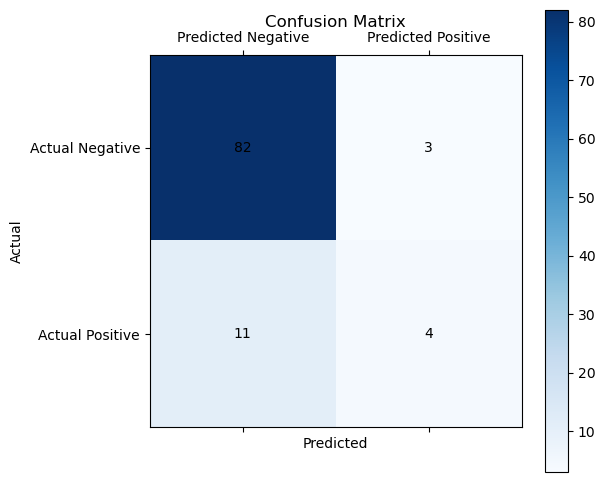

In [90]:
import numpy as np
from matplotlib import pyplot as plt

# Confusion matrix components
TP = ((tmp_train_df['label'] == 1) & (tmp_train_df['predictionIdx'] == 1)).sum()
TN = ((tmp_train_df['label'] == 0) & (tmp_train_df['predictionIdx'] == 0)).sum()
FP = ((tmp_train_df['label'] == 0) & (tmp_train_df['predictionIdx'] == 1)).sum()
FN = ((tmp_train_df['label'] == 1) & (tmp_train_df['predictionIdx'] == 0)).sum()

# Confusion matrix
conf_matrix = np.array([[TN, FP], [FN, TP]])

# Calculate precision, recall, and F1-score
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

# Print scores
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1_score:.4f}')

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(6, 6))
cax = ax.matshow(conf_matrix, cmap="Blues")

# Adding color bar
plt.colorbar(cax)

# Setting axis labels and ticks
ax.set_xticklabels([''] + ['Predicted Negative', 'Predicted Positive'])
ax.set_yticklabels([''] + ['Actual Negative', 'Actual Positive'])

# Annotating the cells with counts
for (i, j), val in np.ndenumerate(conf_matrix):
    ax.text(j, i, f'{val}', ha='center', va='center', color='black')

# Titles and grid
plt.title('Confusion Matrix', pad=20)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig(f"{model_name.replace(":", "-")}.png")
plt.show()